<a href="https://colab.research.google.com/github/omkarpattnaik8080/DataScienceRevision/blob/main/SVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
from sklearn.datasets import make_classification

In [34]:
X,y=make_classification(n_samples=1000,n_features=5,n_classes=2,random_state=123)

In [35]:
X

array([[ 0.87728113, -0.59642825,  0.44019839, -0.52108094,  0.31432298],
       [ 0.55856502, -0.41451292,  0.813623  , -0.54325372,  0.14734302],
       [-0.90289911,  0.38303337, -0.71157267, -0.86768895, -0.67394137],
       ...,
       [ 1.7713853 , -0.96445461,  0.99337636,  0.40674576,  0.99881985],
       [-1.19977749,  0.48167954,  1.47831033, -1.31903526, -0.93698258],
       [ 0.33976266, -0.29183452, -0.82476815, -0.57191024,  0.02935597]])

In [36]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [37]:
pd.DataFrame(X)[0]

,0
0,0.877281
1,0.558565
2,-0.902899
3,-0.487632
4,1.828812
...,...
995,-1.012472
996,-1.069255
997,1.771385
998,-1.199777


<Axes: xlabel='0', ylabel='1'>

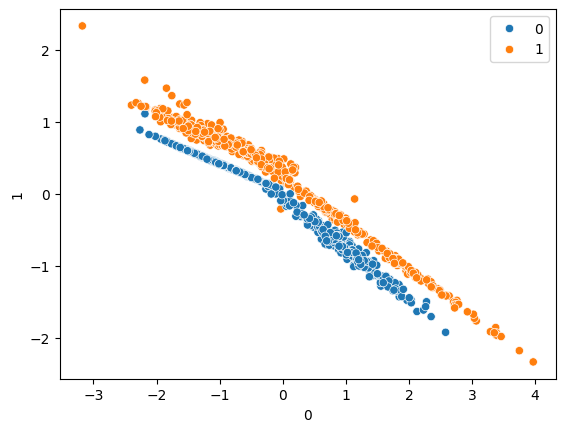

In [38]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [40]:
from sklearn.svm import SVC

In [41]:
svc=SVC(kernel='linear')

In [42]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [43]:
svc.coef_

array([[-0.21570041,  0.57394637, -0.08781236,  2.72731354,  0.5714836 ]])

In [44]:
y_pred=svc.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       101
           1       0.96      0.92      0.94        99

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

[[97  4]
 [ 8 91]]


In [49]:
#hyperparameter tuning with svc
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [50]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [51]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.975 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.981 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.988 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.975 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.981 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.988 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.950 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [52]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [55]:
#prediction
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

[[101   0]
 [  0  99]]


NameError: name 'accuracy_score' is not defined